In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
df_wine_train = pd.read_csv("C:/Users/yagin/bootcamp/Group- Project-4/Project-4/train.csv")
df_wine_train.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [3]:
#take a look at the data types and number of values values 
print(df_wine_train.dtypes)
print("_______________________________________")
print('Number of values in the training data:')
df_wine_train['Id'].count() 

Id                        int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
_______________________________________
Number of values in the training data:


2056

In [4]:
y = df_wine_train['quality'].values.reshape(-1, 1)
print(f" Preview of target y values: {y[:5]}")
#features
X = df_wine_train.copy()
X.drop('quality', axis = 1, inplace = True)
X.head()

 Preview of target y values: [[6]
 [6]
 [7]
 [5]
 [6]]


,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5


In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [7]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [8]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [10]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

C:\Users\yagin\AppData\Local\Temp\ipykernel_11708\478868177.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


In [11]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [12]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0",1, 2, 3, 4, 5], columns=["Predicted 0", 1, 2, 3, 4,5 ]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,1,2,3,4,5
Actual 0,0,0,1,1,0,0
1,0,0,11,0,0,0
2,0,0,152,63,1,0
3,0,0,56,114,13,0
4,0,0,13,53,25,0
5,0,0,1,8,2,0


Accuracy Score : 0.566147859922179
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.65      0.70      0.68       216
           6       0.48      0.62      0.54       183
           7       0.61      0.27      0.38        91
           8       0.00      0.00      0.00        11

    accuracy                           0.57       514
   macro avg       0.29      0.27      0.27       514
weighted avg       0.55      0.57      0.54       514



c:\anaconda3\envs\test\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\test\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\test\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
rf_model.feature_importances_

array([0.08144541, 0.06953555, 0.07986505, 0.06375613, 0.06483457,
       0.07150176, 0.05974429, 0.08778278, 0.08146486, 0.06910085,
       0.13701361, 0.13395515])

In [15]:
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns))

[(0.0597442890387802, 'free sulfur dioxide'),
 (0.06375612510400262, 'citric acid'),
 (0.0648345676116025, 'residual sugar'),
 (0.06910085069529813, 'pH'),
 (0.06953554977475433, 'fixed acidity'),
 (0.0715017556723984, 'chlorides'),
 (0.07986505013647922, 'volatile acidity'),
 (0.08144541063072468, 'Id'),
 (0.08146486138624733, 'density'),
 (0.08778277765059349, 'total sulfur dioxide'),
 (0.1339551477524597, 'alcohol'),
 (0.13701361454665947, 'sulphates')]

In [16]:
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.13701361454665947, 'sulphates'),
 (0.1339551477524597, 'alcohol'),
 (0.08778277765059349, 'total sulfur dioxide'),
 (0.08146486138624733, 'density'),
 (0.08144541063072468, 'Id'),
 (0.07986505013647922, 'volatile acidity'),
 (0.0715017556723984, 'chlorides'),
 (0.06953554977475433, 'fixed acidity'),
 (0.06910085069529813, 'pH'),
 (0.0648345676116025, 'residual sugar'),
 (0.06375612510400262, 'citric acid'),
 (0.0597442890387802, 'free sulfur dioxide')]

<Axes: title={'center': 'Features Importances'}, xlabel='1'>

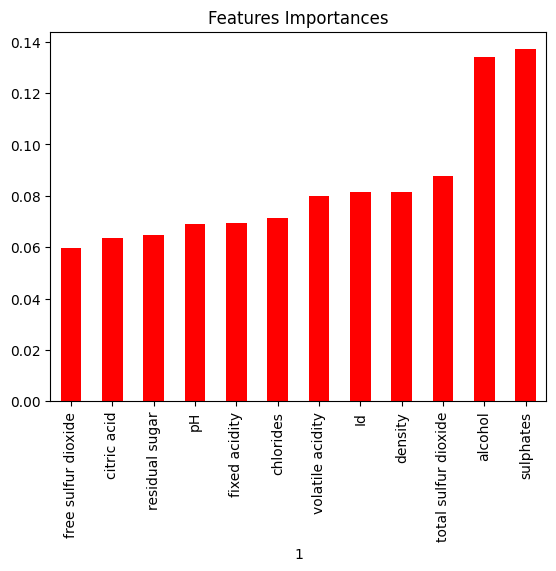

In [23]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='bar', color='red', title= 'Features Importances', legend=False)